# Data Cleaning

### Import Libraries and Load Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Define the directory where all the CSV files are located
data_dir = "instacart-market-basket-analysis"

# Load the CSV files using the directory path
aisles = pd.read_csv(f"{data_dir}/aisles.csv")
departments = pd.read_csv(f"{data_dir}/departments.csv")
orders = pd.read_csv(f"{data_dir}/orders.csv")
order_products_prior = pd.read_csv(f"{data_dir}/order_products__prior.csv")
order_products_train = pd.read_csv(f"{data_dir}/order_products__train.csv")
products = pd.read_csv(f"{data_dir}/products.csv")


#### Data types

In [4]:
# Display basic information
datasets = [aisles, departments, orders, order_products_prior, order_products_train, products]
dataset_names = ["aisles", "departments", "orders", "order_products_prior", "order_products_train", "products"]

for name, df in zip(dataset_names, datasets):
    print(f"Dataset: {name}")
    print(df.info())
    print(df.describe())
    print(df.isnull().sum(), "\n")

Dataset: aisles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
         aisle_id
count  134.000000
mean    67.500000
std     38.826537
min      1.000000
25%     34.250000
50%     67.500000
75%    100.750000
max    134.000000
aisle_id    0
aisle       0
dtype: int64 

Dataset: departments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
       department_id
count      21.000000
mean       11.000000
std         6.204837
min         1.000000
25%     

In [5]:
# Convert 'id' columns to object data type
orders['order_id'] = orders['order_id'].astype(str)
orders['user_id'] = orders['user_id'].astype(str)

# Print updated data types of the columns
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                object 
 1   user_id                 object 
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 182.7+ MB


In [6]:
# Convert 'id' columns to object data type
products['product_id'] = products['product_id'].astype(str)
products['aisle_id'] = products['aisle_id'].astype(str)
products['department_id'] = products['department_id'].astype(str)

# Print updated data types of the columns
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  object
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  object
 3   department_id  49688 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [7]:
# Convert 'id' columns to object data type
order_products_prior['order_id'] = order_products_prior['order_id'].astype(str)
order_products_prior['product_id'] = order_products_prior['product_id'].astype(str)

# Print updated data types of the columns
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           object
 1   product_id         object
 2   add_to_cart_order  int64 
 3   reordered          int64 
dtypes: int64(2), object(2)
memory usage: 989.8+ MB


In [8]:
# Convert 'id' columns to object data type
order_products_train['order_id'] = order_products_train['order_id'].astype(str)
order_products_train['product_id'] = order_products_train['product_id'].astype(str)

# Print updated data types of the columns
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   order_id           1384617 non-null  object
 1   product_id         1384617 non-null  object
 2   add_to_cart_order  1384617 non-null  int64 
 3   reordered          1384617 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 42.3+ MB


In [9]:
# Convert 'id' columns to object data type
aisles['aisle_id'] = aisles['aisle_id'].astype(str)

# Print updated data types of the columns
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    object
 1   aisle     134 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [10]:
# Convert 'id' columns to object data type
departments['department_id'] = departments['department_id'].astype(str)

# Print updated data types of the columns
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     object
 1   department     21 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes


### Missing values

In [11]:
# Checking for missing values
orders.isna().sum()

,0
order_id,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,206209


In [12]:
missing_percentage = (orders.isna().sum() / len(orders)) * 100
print(missing_percentage)

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.027594
dtype: float64


In [13]:
orders.dropna(subset=['days_since_prior_order'], inplace=True)
orders.isna().sum()

,0
order_id,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0


In [14]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


In [15]:
nulls = orders[pd.isna(orders['days_since_prior_order'])]
nulls.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


NaN values in the 'days_since_prior_order' column indicate that a customer does not have a previous order recorded in the dataset.

This typically happens under certain conditions:

First-Time Order: Most often, 'days_since_prior_order' is NaN when a customer makes their very first purchase. With no previous orders to reference, there are no days to calculate since the last order.

One-Time Purchase: Another instance occurs when a customer makes a single purchase and does not place any further orders within the dataset's timeframe. In this case, there is no "prior" order to determine the number of days since, leading to a NaN value.

###### Misssing value of department

In [16]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [17]:
missing_dept = products[products['department_id'] == '21']
missing_dept

,product_id,product_name,aisle_id,department_id
37,38,Ultra Antibacterial Dish Liquid,100,21
71,72,Organic Honeycrisp Apples,100,21
109,110,Uncured Turkey Bologna,100,21
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21
...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21
49574,49575,Chocolate Vanilla Malt Custard,100,21
49640,49641,"8\"" Pecan Pie",100,21
49663,49664,Lemon Cayenne Drinking Vinegar,100,21


In [18]:
total_missing = products[(products['aisle_id'] == '100') & (products['department_id'] == '21')]
total_missing

,product_id,product_name,aisle_id,department_id
37,38,Ultra Antibacterial Dish Liquid,100,21
71,72,Organic Honeycrisp Apples,100,21
109,110,Uncured Turkey Bologna,100,21
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21
...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21
49574,49575,Chocolate Vanilla Malt Custard,100,21
49640,49641,"8\"" Pecan Pie",100,21
49663,49664,Lemon Cayenne Drinking Vinegar,100,21


In [19]:
print('Missing values make up', round(len(missing_dept) / products.shape[0] * 100, 2), "%", "of the overall data.")


Missing values make up 2.53 % of the overall data.


Since missing values only make up 2.53% of the dataset, they represent a very small portion of the total data. In data analysis, it’s often acceptable to drop rows with missing values when they constitute a minor part of the dataset, as their removal is unlikely to affect the overall analysis.



In [20]:
# Drop rows with missing aisle and department
products = products.drop(products[(products['aisle_id'] == '100') & (products['department_id'] == '21')].index)
# check
filtered_df = products[(products['aisle_id'] == '100') | (products['department_id'] == '21')]
filtered_df

,product_id,product_name,aisle_id,department_id


In [21]:
# Checking for missing values
order_products_prior.isna().sum()

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0


### Duplicate data

In [22]:
# Duplicated rows
print("Duplicated rows in:")
print("orders dataset:", orders.duplicated().sum())
print("order products dataset:", order_products_prior.duplicated().sum())
print("order products dataset train:", order_products_train.duplicated().sum())
print("products dataset:", products.duplicated().sum())
print("aisles dataset:", aisles.duplicated().sum())
print("departments dataset:", departments.duplicated().sum())

Duplicated rows in:
orders dataset: 0
order products dataset: 0
order products dataset train: 0
products dataset: 0
aisles dataset: 0
departments dataset: 0


#### Outliers

In [23]:
# Summary statistics of orders dataset
orders.describe()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.214874e+06,3.214874e+06,3.214874e+06,3.214874e+06
mean,1.819107e+01,2.777637e+00,1.344082e+01,1.111484e+01
std,1.779950e+01,2.044923e+00,4.225992e+00,9.206737e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.500000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [24]:
# Summary statistics of order products dataset
order_products_train.describe()

,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06
mean,8.758044e+00,5.985944e-01
std,7.423936e+00,4.901829e-01
min,1.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00
50%,7.000000e+00,1.000000e+00
75%,1.200000e+01,1.000000e+00
max,8.000000e+01,1.000000e+00


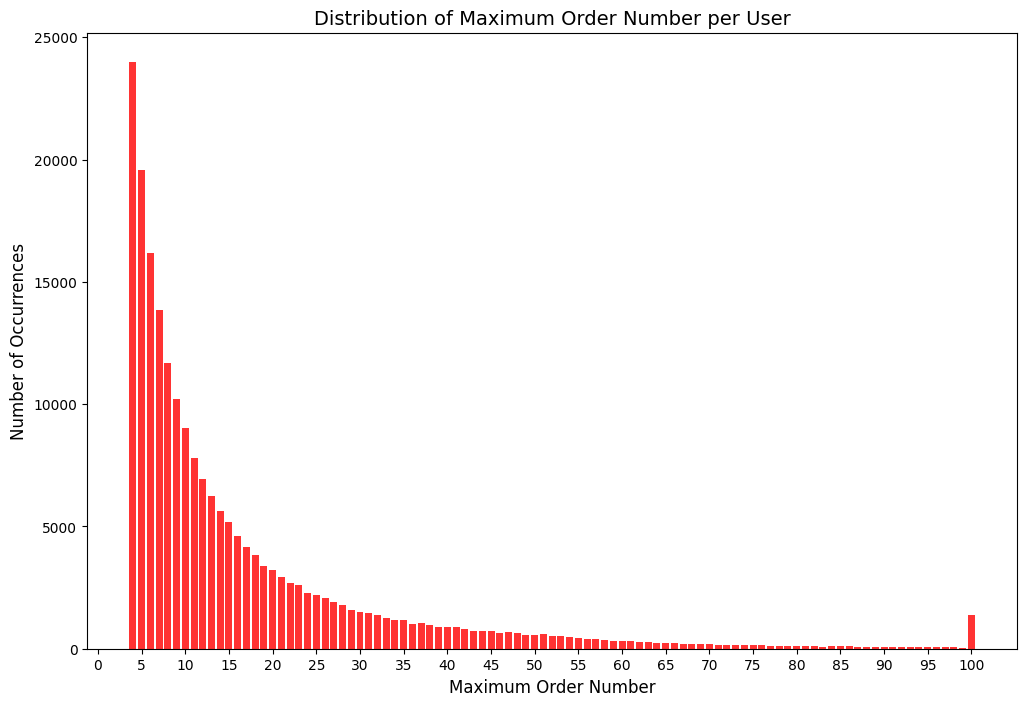

In [25]:
cnt = orders.groupby("user_id")["order_number"].aggregate('max').value_counts()

plt.figure(figsize=(12, 8))
plt.bar(cnt.index, cnt.values, alpha=0.8, color='red')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum Order Number', fontsize=12)

plt.xticks(np.arange(0, 101, 5))

plt.title('Distribution of Maximum Order Number per User', fontsize=14)
plt.show()

Right-Skewed Distribution: Most of the data points fall within the range of 0 to 20, and the frequency of occurrences decreases as the order number increases. This pattern is typical for distributions where lower numbers are more common, and higher numbers are rare.

The values on the far right side, especially those around 100, appear as separate tall bars, which may indicate potential outliers. These extreme values occur much less frequently than the main cluster of data points.
Outliers could suggest either rare high order numbers or possibly errors in the data if such high values are unexpected.

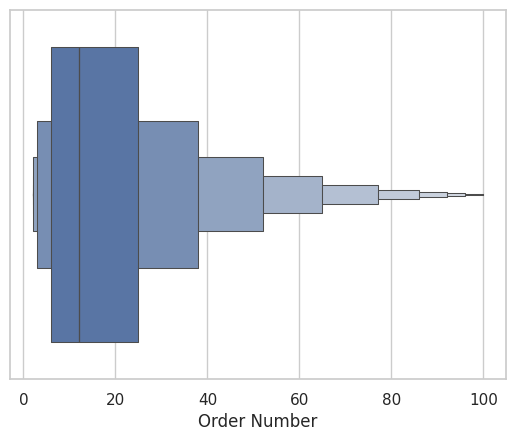

In [26]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = orders['order_number'])
ax.set_xlabel('Order Number')
plt.show()

# EDA

#### Bar plot between products with Reordered = 0 vs Reordered = 1

<ipython-input-27-29842d229aa1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index, y=data.values, palette=colors)


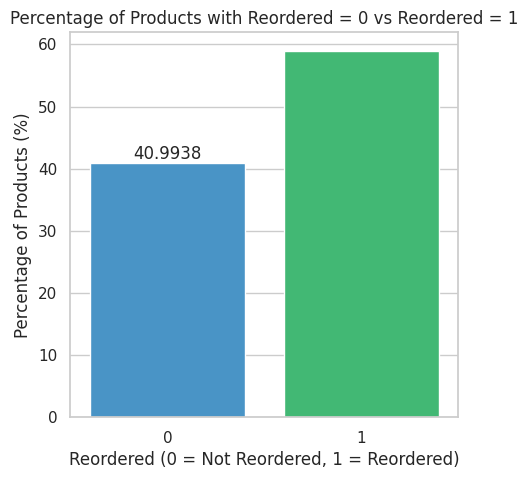

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine order product datasets with reordered information
order_products_all = pd.concat([order_products_prior, order_products_train], ignore_index=True)

# Calculate the percentage distribution of reordered products
data = order_products_all["reordered"].value_counts(normalize=True) * 100

# Choose custom colors (e.g., blue for 'not reordered' and green for 'reordered')
colors = ["#3498db", "#2ecc71"]  # Blue and Green

# Plot the bar plot with custom colors
fig = plt.figure(figsize=(5, 5))
ax = sns.barplot(x=data.index, y=data.values, palette=colors)
ax.bar_label(ax.containers[0])  # Add labels on top of bars

# Add labels and title
plt.xlabel("Reordered (0 = Not Reordered, 1 = Reordered)")
plt.ylabel("Percentage of Products (%)")
plt.title("Percentage of Products with Reordered = 0 vs Reordered = 1")

# Display the plot
plt.show()


##### Order Frequency: Average Days Between Orders

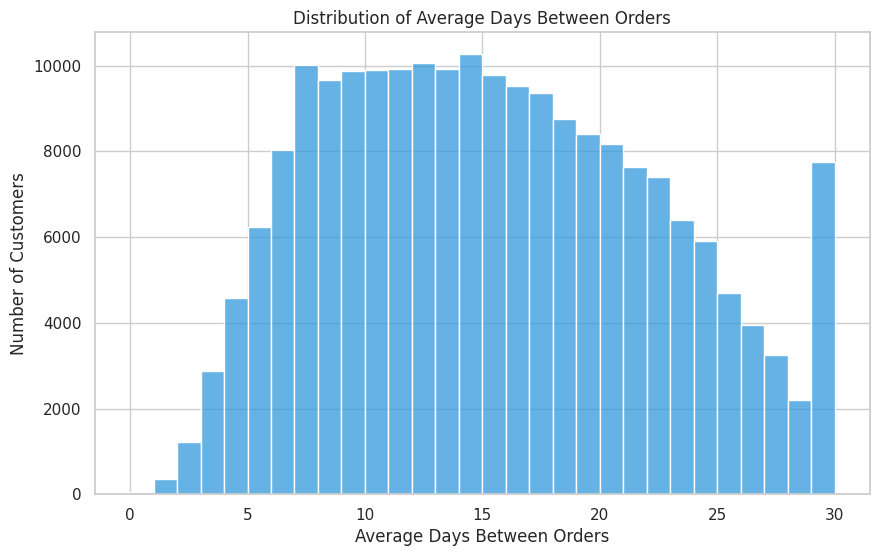

In [28]:
# Calculate the average days between orders for each user
order_frequency = orders.groupby("user_id")["days_since_prior_order"].mean().reset_index()
order_frequency.columns = ["user_id", "avg_days_between_orders"]

# Plot distribution of average days between orders
plt.figure(figsize=(10, 6))
sns.histplot(order_frequency["avg_days_between_orders"], bins=30, color="#3498db")
plt.title("Distribution of Average Days Between Orders")
plt.xlabel("Average Days Between Orders")
plt.ylabel("Number of Customers")
plt.show()


#### Time-Based Patterns: Preferred Days and Times for Ordering

<ipython-input-29-b58f40b720d5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="preferred_order_dow", data=user_order_dow, palette="Set2")


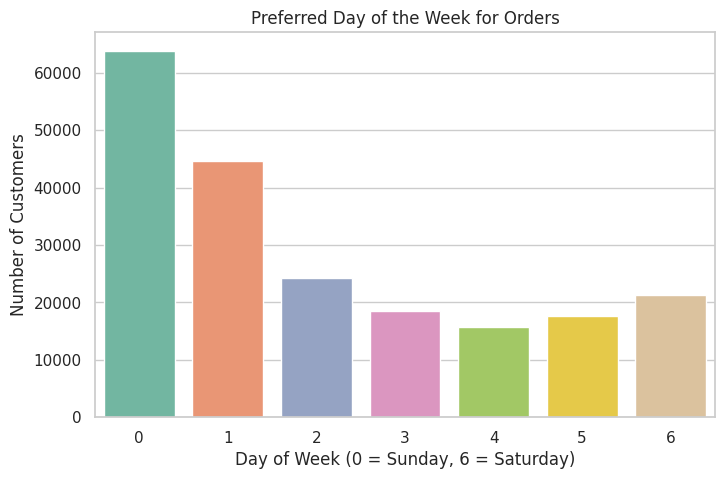

<ipython-input-29-b58f40b720d5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="preferred_order_hour", data=user_order_hour, palette="coolwarm")


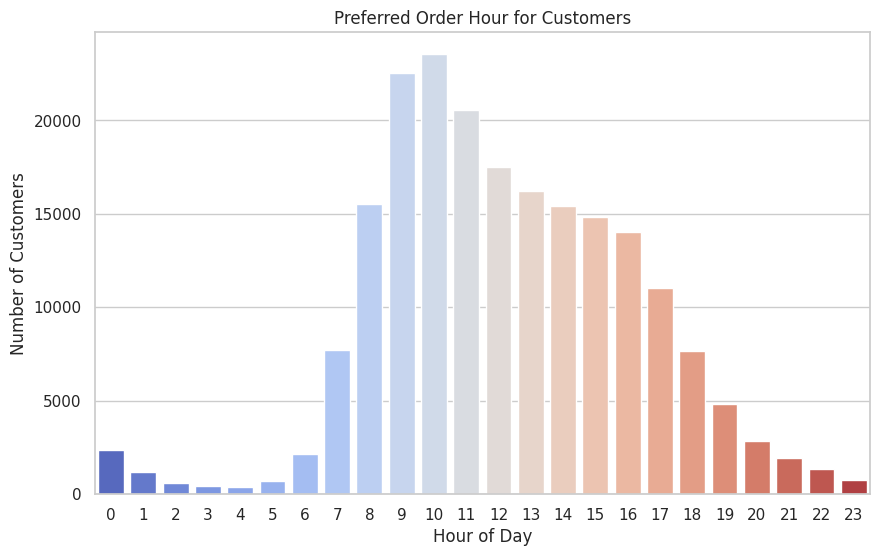

In [29]:
# Preferred day of the week for each user
user_order_dow = orders.groupby("user_id")["order_dow"].apply(lambda x: x.mode()[0]).reset_index()
user_order_dow.columns = ["user_id", "preferred_order_dow"]

# Plot distribution of preferred ordering day of week
plt.figure(figsize=(8, 5))
sns.countplot(x="preferred_order_dow", data=user_order_dow, palette="Set2")
plt.title("Preferred Day of the Week for Orders")
plt.xlabel("Day of Week (0 = Sunday, 6 = Saturday)")
plt.ylabel("Number of Customers")
plt.show()

# Preferred order hour for each user
user_order_hour = orders.groupby("user_id")["order_hour_of_day"].apply(lambda x: x.mode()[0]).reset_index()
user_order_hour.columns = ["user_id", "preferred_order_hour"]

# Plot distribution of preferred ordering hour
plt.figure(figsize=(10, 6))
sns.countplot(x="preferred_order_hour", data=user_order_hour, palette="coolwarm")
plt.title("Preferred Order Hour for Customers")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Customers")
plt.show()


#### Basket Size: Average Number of Products Per Order

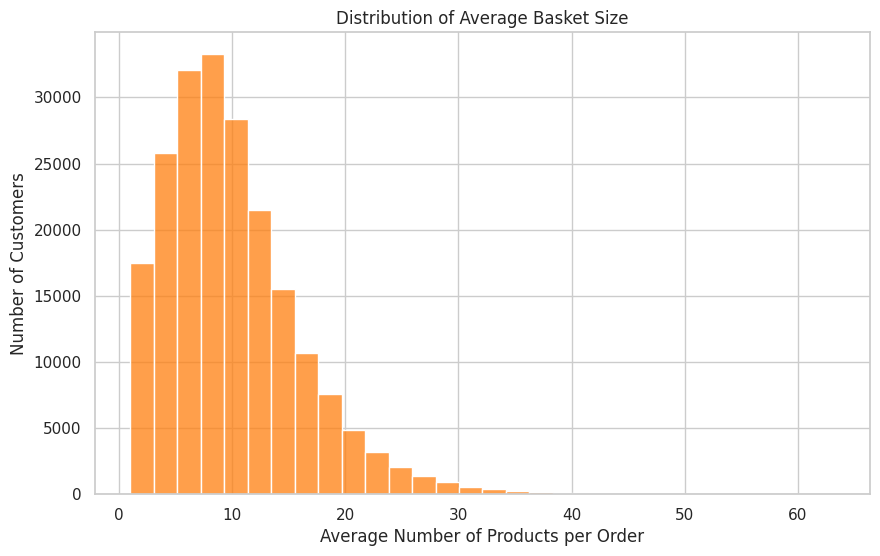

In [30]:
# Calculate average basket size for each user
basket_size = order_products_all.groupby("order_id")["product_id"].count().reset_index()
basket_size = orders.merge(basket_size, on="order_id", how="left").groupby("user_id")["product_id"].mean().reset_index()
basket_size.columns = ["user_id", "avg_basket_size"]

# Plot distribution of average basket sizes across customers
plt.figure(figsize=(10, 6))
sns.histplot(basket_size["avg_basket_size"], bins=30, color="#ff7f0e")
plt.title("Distribution of Average Basket Size")
plt.xlabel("Average Number of Products per Order")
plt.ylabel("Number of Customers")
plt.show()


##### Merging Dataset and feature engineering

In [31]:
# Step 1: Combine order product datasets with reordered information
order_products_all = pd.concat([order_products_prior, order_products_train], ignore_index=True)

# Merge order_products_all with products, aisles, departments for more comprehensive data
order_products_all = order_products_all.merge(products, on='product_id', how='inner') \
                                       .merge(aisles, on='aisle_id', how='inner') \
                                       .merge(departments, on='department_id', how='inner')

# Step 2: Merge order_products_all with orders to bring reorder information into the orders DataFrame
orders_with_reorder_info = orders.merge(
    order_products_all[['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'aisle', 'department']],
    on='order_id',
    how='inner'  # Use 'inner' to include only matching rows
)

# Step 3: Feature Engineering - Now calculate reorder-related features

# Product order count (total number of times a product has been ordered)
product_order_counts = order_products_all.groupby('product_id').size().reset_index(name='product_order_count')
order_products_all = order_products_all.merge(product_order_counts, on='product_id', how='inner')

# Product reorder rate (calculate the reorder rate per product)
order_products_all['product_reorder_rate'] = order_products_all.groupby('product_id')['reordered'].transform('mean')

# Reorder ratio per product (frequency of reorders per product as a ratio of total orders)
reorder_ratio = order_products_all.groupby('product_id')['reordered'].mean().reset_index(name='reorder_ratio')
order_products_all = order_products_all.merge(reorder_ratio, on='product_id', how='inner')

# Feature: Normalize `days_since_prior_order`
orders['days_since_prior_order_normalized'] = orders['days_since_prior_order'] / orders['days_since_prior_order'].max()

orders_with_reorder_info = orders.merge(
    order_products_all[['order_id','add_to_cart_order', 'reordered', 'product_order_count', 'aisle', 'department', 'product_reorder_rate', 'reorder_ratio' ]],
    on='order_id',
    how='inner'  # Use 'inner' to include only matching rows
)

# Check if the features were added successfully
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,days_since_prior_order_normalized
1,2398795,1,prior,2,3,7,15.0,0.500000
2,473747,1,prior,3,3,12,21.0,0.700000
3,2254736,1,prior,4,4,7,29.0,0.966667
4,431534,1,prior,5,4,15,28.0,0.933333
5,3367565,1,prior,6,2,7,19.0,0.633333
...,...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0,0.966667
3421079,1854736,206209,prior,11,4,10,30.0,1.000000
3421080,626363,206209,prior,12,1,12,18.0,0.600000
3421081,2977660,206209,prior,13,1,12,7.0,0.233333


In [32]:
orders_with_reorder_info = orders.merge(
    order_products_all[['order_id','product_id','add_to_cart_order', 'reordered', 'product_order_count', 'product_reorder_rate', 'reorder_ratio' ]],
    on='order_id',
    how='inner'  # Use 'inner' to include only matching rows
)


In [33]:
orders_with_reorder_info

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,days_since_prior_order_normalized,product_id,add_to_cart_order,reordered,product_order_count,product_reorder_rate,reorder_ratio
0,2398795,1,prior,2,3,7,15.0,0.5,196,1,1,37298,0.777843,0.777843
1,2398795,1,prior,2,3,7,15.0,0.5,10258,2,0,2050,0.715610,0.715610
2,2398795,1,prior,2,3,7,15.0,0.5,12427,3,1,6697,0.740182,0.740182
3,2398795,1,prior,2,3,7,15.0,0.5,13176,4,0,394930,0.833755,0.833755
4,2398795,1,prior,2,3,7,15.0,0.5,26088,5,1,2659,0.540429,0.540429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31665903,272231,206209,train,14,6,14,30.0,1.0,40603,4,0,816,0.218137,0.218137
31665904,272231,206209,train,14,6,14,30.0,1.0,15655,5,0,1661,0.535220,0.535220
31665905,272231,206209,train,14,6,14,30.0,1.0,42606,6,0,924,0.471861,0.471861
31665906,272231,206209,train,14,6,14,30.0,1.0,37966,7,0,2631,0.495249,0.495249


These engineered features give insights into the user’s ordering patterns, frequency, and likelihood to reorder, which are valuable for predicting reorder behavior.

Correlation

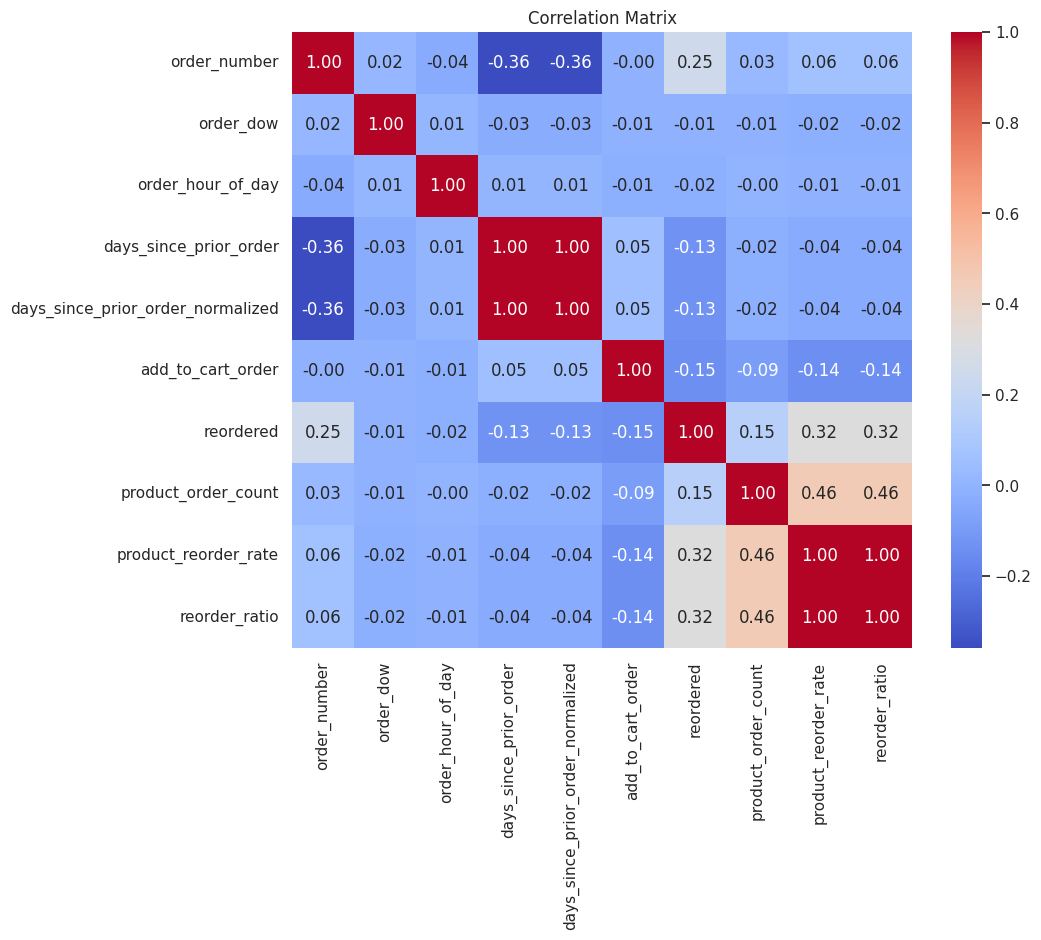

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = orders_with_reorder_info.select_dtypes(include=np.number).corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

We are dropping 'order_dow', 'order_hour_of_day', 'add_to_cart_order' because it has low correlation with target variable

In [35]:
var = ['order_number', 'days_since_prior_order_normalized','add_to_cart_order',
       'product_order_count', 'product_reorder_rate', 'reorder_ratio']
X = orders_with_reorder_info[var]
y = orders_with_reorder_info['reordered']

In [36]:
X.columns.duplicated()

array([False, False, False, False, False, False])

Checking multicollinearity

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Add a constant column to the feature matrix (required for VIF calculation)
X_with_constant = X.copy()
X_with_constant['constant'] = 1

# Compute VIF for each feature
vif_data = pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X_with_constant.values, i) for i in range(X.shape[1])]
})

print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                             Feature       VIF
0                       order_number  1.151146
1  days_since_prior_order_normalized  1.151197
2                  add_to_cart_order  1.024990
3                product_order_count  1.266422
4               product_reorder_rate       inf
5                      reorder_ratio       inf


We are dropping reorder_ratio because of multicollinearity issue

In [38]:
from sklearn.model_selection import train_test_split

var = ['order_number', 'days_since_prior_order_normalized','add_to_cart_order',
       'product_order_count', 'product_reorder_rate']
X = orders_with_reorder_info[var]
y = orders_with_reorder_info['reordered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
print(np.mean(y_train), np.mean(y))

0.6292174326197542 0.6292205800635813


In [39]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler_test = preprocessing.StandardScaler().fit(X_test)
scaler


StandardScaler()

In [40]:
scaler.mean_
scaler_test.mean_

array([1.81779683e+01, 3.79020133e-01, 8.36922838e+00, 3.74981880e+04,
       5.91328310e-01])

In [41]:
scaler.scale_
scaler_test.scale_

array([1.75423778e+01, 2.98094759e-01, 7.14457330e+00, 8.31342852e+04,
       1.49829716e-01])

In [42]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler_test.transform(X_test)
X_train_scaled
X_test_scaled

array([[-0.69420283,  2.08316265, -0.19164593,  0.2302878 ,  0.33008778],
       [-0.69420283, -0.37690521,  0.22825319, -0.45071883, -3.46993742],
       [-0.80821246,  2.08316265, -0.61154504, -0.43942385,  0.54653926],
       ...,
       [-0.69420283,  1.30041378,  0.92808504, -0.20546503, -0.40801576],
       [-0.12415468,  1.52405632, -0.61154504, -0.31029542, -0.8000445 ],
       [ 0.10386458,  2.08316265,  0.36821956, -0.44143265, -1.14348685]])

<h1>Supervised</h1>

<h2>Logistic Regression</h2>

In [ ]:
from sklearn.linear_model import LogisticRegression
# Run the Logistic Regression Model:
## (a) Define function, train the model. Report coefficient.
logclf = LogisticRegression(max_iter=1000,class_weight='balanced')
logclf.fit(X_train_scaled, y_train)
## (b) Accuracy
print("Accuracy is:",  logclf.score(X_test_scaled, y_test)    )

# Get it manually

y_pred_test = logclf.predict(X_test_scaled)

np.mean(y_pred_test == y_test)

Accuracy is: 0.6829633939440486


0.6829633939440486

In [ ]:
print(np.mean(0 == y_test))
1 - np.mean(y_test)

0.37076997760493713


0.37076997760493713

Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

test_matrix = confusion_matrix(y_test, y_pred_test)

test_matrix

array([[2031512,  903680],
       [1606133, 3375152]])

In [ ]:
print("TP is:", test_matrix[1,1])
print("TN is:", test_matrix[0,0])
print("FP is:", test_matrix[0,1])
print("FN is:", test_matrix[1,0])

TP is: 3375152
TN is: 2031512
FP is: 903680
FN is: 1606133


Additional performance measures

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


print('Precision score:', precision_score(y_test, y_pred_test))
print('Recall score:', recall_score(y_test, y_pred_test))
print('Accuracy score:', accuracy_score(y_test, y_pred_test))
print('F1 score:', f1_score(y_test, y_pred_test))

Precision score: 0.7888021777905746
Recall score: 0.6775665315275075
Accuracy score: 0.6829633939440486
F1 score: 0.7289653035701384


Precision Recall curve

Text(0, 0.5, 'precision')

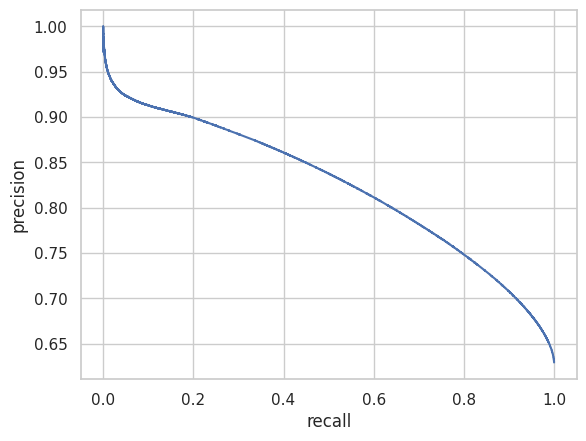

In [ ]:
from sklearn.metrics import precision_recall_curve

# S1. Get probability - what does predict_proba(X) provide?
logclf.predict_proba(X_test_scaled) ## two columns [y = 0, y = 1], based on indexing
log_prob_test = logclf.predict_proba(X_test_scaled)[ : , 1 ]

# S2. Collect Necessary Measures
precision, recall, threshold = precision_recall_curve(y_test, log_prob_test)

# S3. Plot Figure

plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")

ROC curve

Text(0, 0.5, 'TPR')

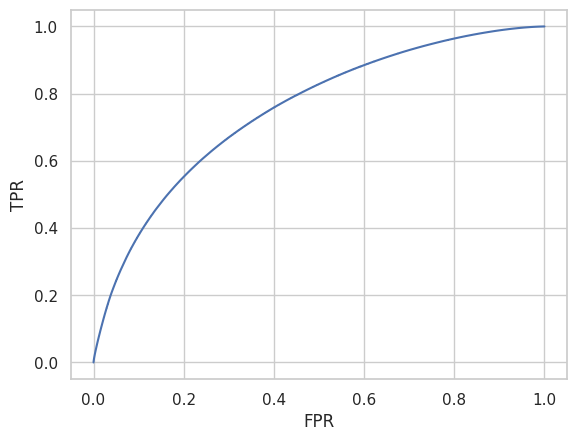

In [ ]:
# Practice 2: Similar to Precision-Recall Curve, get ROC

from sklearn.metrics import roc_curve

# Predicted Probability: log_prob_test

# Get Measures
fpr, tpr, threshold = roc_curve(y_test, log_prob_test)

# Generate Figure

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [ ]:
from sklearn.metrics import roc_auc_score

# we have obtained the predicted probability in the previous step: log_prob_test

print("AUC for logistic regression:", roc_auc_score(y_test, log_prob_test)  )

AUC for logistic regression: 0.7510380757402134


<h2>Decision Tree</>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_full = DecisionTreeClassifier(random_state = 0)

dt_full.fit(X_train, y_train)
dt_full.score(X_test, y_test), dt_full.score(X_train, y_train)

(0.644541757653057, 0.9214097803016839)

In [ ]:
dt_full.feature_importances_

array([0.21612247, 0.14690765, 0.13041277, 0.19612959, 0.31042751])

<BarContainer object of 5 artists>

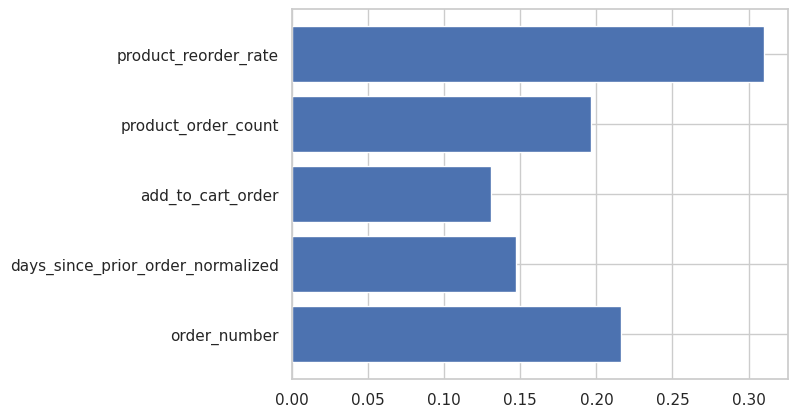

In [ ]:
feature_names = np.array(var)
x = feature_names
y = dt_full.feature_importances_

plt.barh(x,y)

In [ ]:
idx = dt_full.feature_importances_ > 0 # logical indexing

y_nonzero = dt_full.feature_importances_[idx]

In [ ]:
x_nonzero = feature_names[idx]

<BarContainer object of 5 artists>

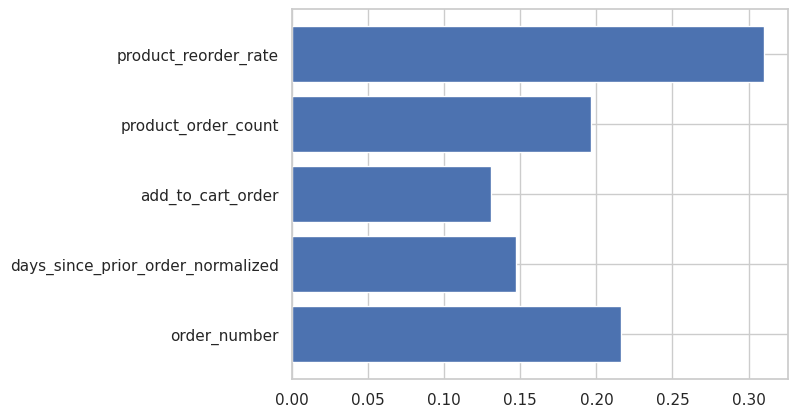

In [ ]:
plt.barh(x_nonzero, y_nonzero)

<h3>Addressing overfitting</h3>

In [ ]:
# Let maximum depth be 7
from sklearn.tree import DecisionTreeClassifier
# A Basic Tree
dt_7 = DecisionTreeClassifier(max_depth = 7, random_state = 0)
dt_7.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [ ]:
dt_7.score(X_test, y_test), dt_7.score(X_train, y_train)

(0.7234601957411106, 0.723621252231264)

<h3>Visualizing the tree</h3>

In [ ]:
from sklearn import tree
print(tree.export_text(dt_7))

|--- feature_0 <= 7.50
|   |--- feature_4 <= 0.56
|   |   |--- feature_4 <= 0.40
|   |   |   |--- feature_4 <= 0.28
|   |   |   |   |--- feature_1 <= 0.02
|   |   |   |   |   |--- feature_2 <= 5.50
|   |   |   |   |   |   |--- feature_4 <= 0.03
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  0.03
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  5.50
|   |   |   |   |   |   |--- feature_4 <= 0.02
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  0.02
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.02
|   |   |   |   |   |--- feature_4 <= 0.18
|   |   |   |   |   |   |--- feature_4 <= 0.10
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  0.10
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  0.18
|   |   |   |   |   |   |--- feature_0 <= 4.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |  

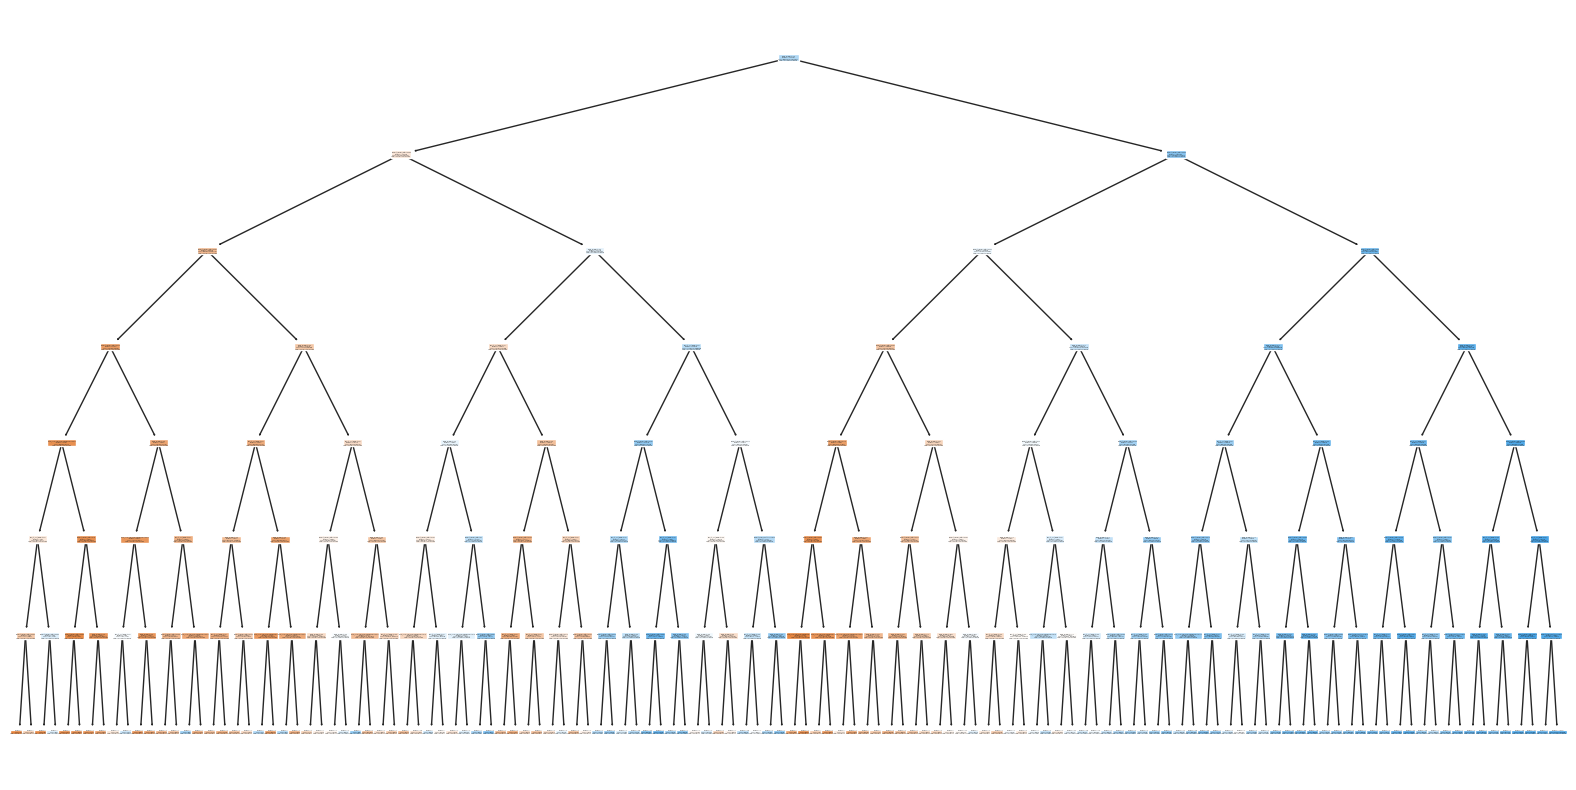

In [ ]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) # set a proper figure size (in case that the figure is too small to read or ratio is not proper)
y_str = [str(val) for val in y]
tree.plot_tree(dt_7,
               feature_names = list(var), # specify variable names
               class_names = list(y_str), # specify class (Y) names
           #     feature_names = cancer.feature_names, # specify variable names
           #     class_names = cancer.target_names, # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read
plt.show()


<h2>Random forest</h2>

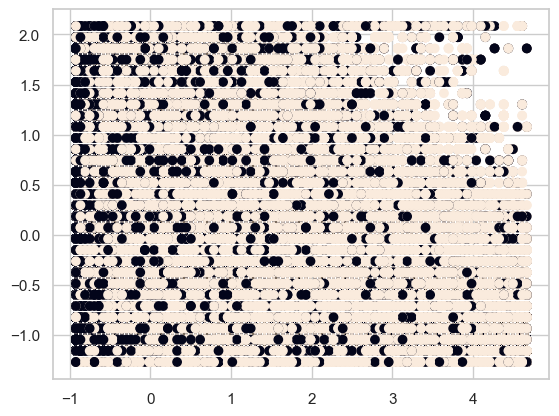

In [ ]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:, 1], c=y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=200, max_samples=100, random_state=42) # max_depth = 3
rnd_clf.fit(X_train_scaled, y_train)

print(rnd_clf.score(X_test_scaled, y_test))

# 200 complete trees

## Alternatively, you may want to preprune
## In this case, specify max_depth, min_sample_splits, .... as if you have DT

0.7232090739352871


<h1>Unsupervised</h1>

<h2>K means clustering</h2>

In [ ]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
inertia = []
k_values = range(1,10,1)

for i in k_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    print("Inertia:", kmeans.inertia_)

Inertia: 158329540.00000077
Inertia: 129508599.1474819
Inertia: 103563367.72207451
Inertia: 86602499.73021886
Inertia: 70415589.74422684
Inertia: 59675584.66947432
Inertia: 56284296.927162826
Inertia: 52730548.42668409
Inertia: 49716877.24477941


Graph to see the elbow point for optimal k

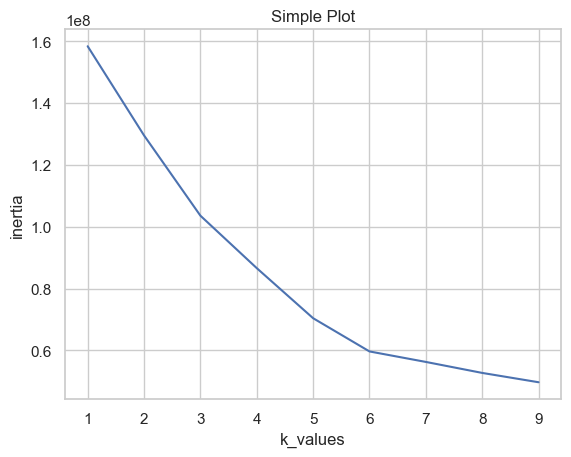

In [ ]:
plt.plot(k_values,inertia)
plt.xlabel('k_values')
plt.ylabel('inertia')
plt.title('Simple Plot')
plt.show()

In [ ]:
kmeans_opt = KMeans(n_clusters=3, random_state=42)
kmeans_opt.fit(X_scaled)
print("Inertia:", kmeans.inertia_)

Inertia: 49716877.24477941


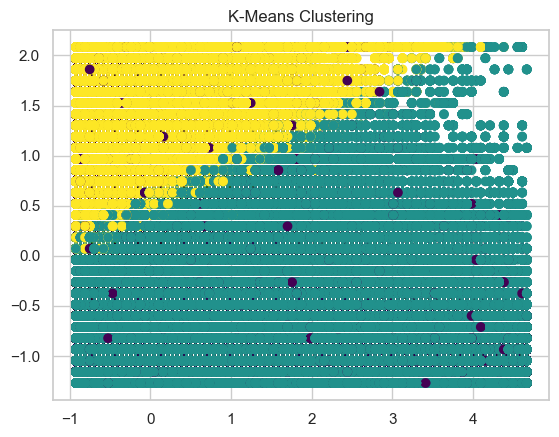

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_opt.labels_, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

In [ ]:
orders_with_reorder_info['cluster'] = kmeans_opt.labels_

In [ ]:
# Check cluster sizes
print(orders_with_reorder_info['cluster'].value_counts())

# Analyze cluster means for insights
print(orders_with_reorder_info.groupby('cluster').mean())

1    21709728
2     8269748
0     1686432
Name: cluster, dtype: int64
         order_number  order_dow  order_hour_of_day  days_since_prior_order  \
cluster                                                                       
0           19.300747   2.663108          13.418366               10.543292   
1           21.810593   2.769604          13.378276                6.602999   
2            8.439587   2.673873          13.523620               24.036091   

         days_since_prior_order_normalized  add_to_cart_order  reordered  \
cluster                                                                    
0                                 0.351443           5.951145   0.861528   
1                                 0.220100           8.157661   0.664486   
2                                 0.801203           9.418353   0.489269   

         product_order_count  product_reorder_rate  reorder_ratio  
cluster                                                            
0              34

/var/folders/_r/jph4ypfd7z35wm4g65db9bc40000gn/T/ipykernel_80861/3632881622.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(orders_with_reorder_info.groupby('cluster').mean())


<h2>Key Insights:</h2>

<b>Cluster 1: Moderate regulars: </b>Dark Purple<br>
Moderate reorder rates (~60%) and more frequent orders (7.6 days). Likely regular but less loyal shoppers.

<b>Cluster 2: Highly active and loyal customers: </b>Yellow<br>
Very frequent shoppers (every ~5.4 days), high reorder rates, and a lot of orders overall. These are the most active and loyal customers.

<b>Cluster 3: Frequent and consistent bulk buyers: </b>Green<br>
A mix of frequent shoppers (10.7 days) and high reorder rates (~85%). Likely includes bulk buyers or those with consistent routines.

<h2>Neural Net LSTM</h2>

<h2>Feature Engineering for LSTM</h2>

<h1>Data Preparation and Feature Engineering</h1>
        <h2>1. Data Preparation</h2>
        <p>Reshape data into sequential format. Each sequence should represent a user's order history for a specific product. The sequence might include features such as:</p>
        <ul>
            <li>Whether the product was reordered in previous orders (target: <code>reordered</code>).</li>
            <li>Day of the week and hour of the day.</li>
            <li>Order position or sequence ID.</li>
        </ul>

<h2>2. Feature Engineering</h2>
<p>Create features such as:</p>
<ul>
    <li><strong>Order count:</strong> How often a user orders a product.</li>
    <li><strong>Time gaps:</strong> Days since the last purchase of the product.</li>
    <li><strong>Order history:</strong> Include other metadata, like average cart size or user-product affinity scores.</li>
</ul>
<h2>3. Split Data into Training and Test Sets</h2>
<p>For each user-product pair, create a sequence of inputs (<code>X</code>) and a target (<code>y</code>).</p>


In [43]:
orders_with_reorder_info

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,days_since_prior_order_normalized,product_id,add_to_cart_order,reordered,product_order_count,product_reorder_rate,reorder_ratio
0,2398795,1,prior,2,3,7,15.0,0.5,196,1,1,37298,0.777843,0.777843
1,2398795,1,prior,2,3,7,15.0,0.5,10258,2,0,2050,0.715610,0.715610
2,2398795,1,prior,2,3,7,15.0,0.5,12427,3,1,6697,0.740182,0.740182
3,2398795,1,prior,2,3,7,15.0,0.5,13176,4,0,394930,0.833755,0.833755
4,2398795,1,prior,2,3,7,15.0,0.5,26088,5,1,2659,0.540429,0.540429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31665903,272231,206209,train,14,6,14,30.0,1.0,40603,4,0,816,0.218137,0.218137
31665904,272231,206209,train,14,6,14,30.0,1.0,15655,5,0,1661,0.535220,0.535220
31665905,272231,206209,train,14,6,14,30.0,1.0,42606,6,0,924,0.471861,0.471861
31665906,272231,206209,train,14,6,14,30.0,1.0,37966,7,0,2631,0.495249,0.495249


In [44]:
# Example: frequency-based affinity score calculation
user_product_affinity = orders_with_reorder_info.groupby(['user_id', 'product_id']).size().reset_index(name='user_purchase_count')
user_product_affinity['affinity_score'] = user_product_affinity['user_purchase_count'] / user_product_affinity.groupby('user_id')['user_purchase_count'].transform('sum')


In [45]:
orders_with_reorder_info = orders_with_reorder_info.merge(
    user_product_affinity[['user_id', 'product_id','user_purchase_count', 'affinity_score']],
    on=['user_id', 'product_id'],
    how='inner'
)

In [46]:
var_lstm = ['order_dow', 'order_hour_of_day', 'user_purchase_count', 'days_since_prior_order_normalized', 'affinity_score']
X_lstm = orders_with_reorder_info[var_lstm]
y_lstm = orders_with_reorder_info['reordered']

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_lstm_scaled = scaler.fit_transform(X_lstm)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [49]:
# Reshape X_lstm_scaled to 3D array for LSTM input
# Sequence length should be set based on your desired time window, here assuming 10 for example
sequence_length = 10

# Prepare sequences for LSTM (sliding window approach)
sequences = []
targets = []


In [50]:
for i in range(len(X_lstm_scaled) - sequence_length):
    sequences.append(X_lstm_scaled[i:i + sequence_length])  # Input sequence
    targets.append(y_lstm.iloc[i + sequence_length])  # Target: reordered

In [51]:
# Convert to numpy arrays
X_lstm_seq = np.array(sequences)
y_lstm_seq = np.array(targets)

In [52]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm_seq, y_lstm_seq, test_size=0.2, random_state=42)

In [53]:
import tensorflow
# Convert to TensorFlow tensors
X_train_lstm_tf = tensorflow.convert_to_tensor(X_train_lstm)
X_test_lstm_tf = tensorflow.convert_to_tensor(X_test_lstm)
y_train_lstm_tf = tensorflow.convert_to_tensor(y_train_lstm)
y_test_lstm_tf = tensorflow.convert_to_tensor(y_test_lstm)

In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(128, input_shape=(sequence_length, X_lstm_seq.shape[-1]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification: 1 for reordered, 0 for not reordered
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train_lstm_tf, y_train_lstm_tf, epochs=10, batch_size=64, validation_data=(X_test_lstm_tf, y_test_lstm_tf))

Epoch 1/10
395824/395824 ━━━━━━━━━━━━━━━━━━━━ 2547s 6ms/step - accuracy: 0.7132 - loss: 0.5525 - val_accuracy: 0.7219 - val_loss: 0.5390
Epoch 2/10
395824/395824 ━━━━━━━━━━━━━━━━━━━━ 2574s 7ms/step - accuracy: 0.7216 - loss: 0.5397 - val_accuracy: 0.7231 - val_loss: 0.5371
Epoch 3/10
395824/395824 ━━━━━━━━━━━━━━━━━━━━ 2577s 7ms/step - accuracy: 0.7225 - loss: 0.5380 - val_accuracy: 0.7236 - val_loss: 0.5361
Epoch 4/10
395824/395824 ━━━━━━━━━━━━━━━━━━━━ 2585s 7ms/step - accuracy: 0.7230 - loss: 0.5372 - val_accuracy: 0.7239 - val_loss: 0.5359
Epoch 5/10
395824/395824 ━━━━━━━━━━━━━━━━━━━━ 2646s 7ms/step - accuracy: 0.7232 - loss: 0.5368 - val_accuracy: 0.7240 - val_loss: 0.5354
Epoch 6/10
395824/395824 ━━━━━━━━━━━━━━━━━━━━ 2643s 7ms/step - accuracy: 0.7235 - loss: 0.5363 - val_accuracy: 0.7242 - val_loss: 0.5352
Epoch 7/10
395824/395824 ━━━━━━━━━━━━━━━━━━━━ 2645s 7ms/step - accuracy: 0.7236 - loss: 0.5361 - val_accuracy: 0.7244 - val_loss: 0.5353
Epoch 8/10
395824/395824 ━━━━━━━━━━━━━━━━

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-70-0334d45600c6>", line 2, in <cell line: 2>
    model.fit(X_train_lstm_tf, y_train_lstm_tf, epochs=10, batch_size=64, validation_data=(X_test_lstm_tf, y_test_lstm_tf))
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit
    logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 833, in __call__
    result = self._call(*args, 

TypeError: object of type 'NoneType' has no len()

In [ ]:
model.save('model_checkpoint.keras')

In [62]:
from tensorflow.keras.models import load_model
model = load_model('model_checkpoint.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint('model_checkpoint_epoch_{epoch:02d}.keras', save_weights_only=False, save_freq='epoch')
model.fit(X_train_lstm_tf, y_train_lstm_tf, epochs=2, initial_epoch=8,batch_size=64,validation_data=(X_test_lstm_tf, y_test_lstm_tf), callbacks=[checkpoint_callback])


In [63]:
checkpoint_callback_1 = ModelCheckpoint('model_checkpoint_epoch_{epoch:02d}.keras', save_weights_only=False, save_freq='epoch')
model.fit(X_train_lstm_tf, y_train_lstm_tf, epochs=10, initial_epoch=8,batch_size=64,validation_data=(X_test_lstm_tf, y_test_lstm_tf), callbacks=[checkpoint_callback_1])

Epoch 9/10
395824/395824 ━━━━━━━━━━━━━━━━━━━━ 2185s 6ms/step - accuracy: 0.7224 - loss: 0.5405 - val_accuracy: 0.7220 - val_loss: 0.5404
Epoch 10/10
395824/395824 ━━━━━━━━━━━━━━━━━━━━ 2209s 6ms/step - accuracy: 0.7192 - loss: 0.5468 - val_accuracy: 0.7203 - val_loss: 0.5433


Since the accuracy decreased at the 9th and the 10th epoch, we are gonna use the model that was trained untill 8th epoch

In [64]:
model = load_model('model_checkpoint.keras')

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_lstm_tf, y_test_lstm_tf)
print(f"Test Accuracy: {accuracy:.2f}")

197912/197912 ━━━━━━━━━━━━━━━━━━━━ 462s 2ms/step - accuracy: 0.7246 - loss: 0.5349
Test Accuracy: 0.72


In [ ]:
# Optionally: Predict and print the first 5 predictions
predictions = model.predict(X_test_lstm)
print(f"Predictions: {predictions[:5]}")

197912/197912 ━━━━━━━━━━━━━━━━━━━━ 348s 2ms/step
Predictions: [[0.6388325 ]
 [0.73709005]
 [0.97404385]
 [0.3290553 ]
 [0.45015696]]


In [65]:
!ls

instacart-market-basket-analysis  model_checkpoint_epoch_10.keras  model_checkpoint.keras
model_checkpoint_epoch_09.keras   model_checkpoint.h5		   sample_data


In [66]:
!pwd

/content
